<a href="https://colab.research.google.com/github/Ilia-Gershen/TYP-project/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Preprocessing** - converting data to format needed for model training

# Loading Data from Database

In [ ]:
ETH = pd.read_csv("/content/drive/MyDrive/Database/ETH-USD.csv") #data from 2017 to 2022 used from finance.yahoo.com
ETH.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-19,347.401001,371.290985,344.739990,354.385986,354.385986,1181529984
1,2017-11-20,354.093994,372.136993,353.289001,366.730011,366.730011,807027008
2,2017-11-21,367.442993,372.470001,350.692993,360.401001,360.401001,949912000
3,2017-11-22,360.312012,381.420013,360.147003,380.652008,380.652008,800819008
4,2017-11-23,381.438995,425.548004,376.088013,410.165985,410.165985,1845680000


In [ ]:
ETH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1827 non-null   object 
 1   Open       1827 non-null   float64
 2   High       1827 non-null   float64
 3   Low        1827 non-null   float64
 4   Close      1827 non-null   float64
 5   Adj Close  1827 non-null   float64
 6   Volume     1827 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 100.0+ KB


Now lets see the destribution of volume values, in order to choose best normalizaiton technic for that type of data

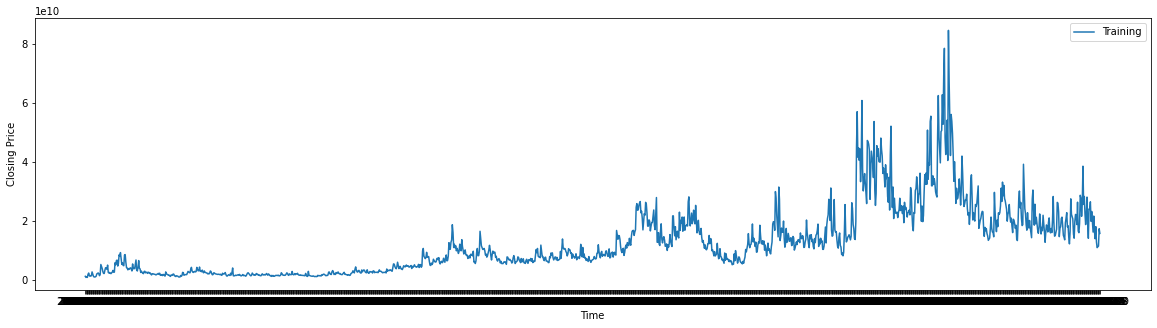

In [ ]:
plt.figure(figsize = (20, 5))

plt.plot(ETH['Date'][ETH['Date'] < '2021-12-30'], ETH['Volume'][ETH['Date'] < '2021-12-30'], label = 'Training')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

Here we change all the values to be the same format

In [ ]:
ETH["Date"] = pd.to_datetime(ETH["Date"]) #converting Date from Object to datetime format
ETH = ETH.astype({"Volume":float}) #converting volume from int to float64
ETH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1827 non-null   datetime64[ns]
 1   Open       1827 non-null   float64       
 2   High       1827 non-null   float64       
 3   Low        1827 non-null   float64       
 4   Close      1827 non-null   float64       
 5   Adj Close  1827 non-null   float64       
 6   Volume     1827 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 100.0 KB


It is clear that data is in sutable format now and it is time for next step

# Exploratory Data Analysis



Text(0, 0.5, 'Adj. Close Price')

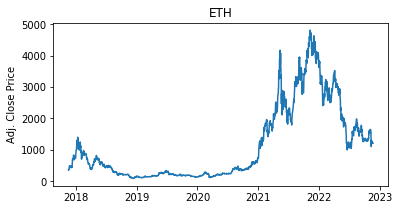

In [ ]:
# Lets look at history of closing prices for ETH USD pair
plt.figure(figsize = (6,3))
plt.plot(ETH["Date"], ETH["Adj Close"])
plt.title("ETH")
plt.ylabel('Adj. Close Price')

Now saving the edited csv to the Database

In [ ]:
df = pd.DataFrame(ETH)
df.to_csv("/content/drive/MyDrive/Database/ETH-preprocessed.csv") #saving changed csv to google drive